<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture-59-Basic-of-Perceptron-trick-and-Logistic-Regression/Lecture_59_gradient_descent_from_scratch_using_classification_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# importing necessary libraries
from sklearn.datasets import make_classification

import numpy as np

In [42]:
# Generate synthetic classification data

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,

                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=20)


In [43]:
# Import matplotlib for plotting

import matplotlib.pyplot as plt

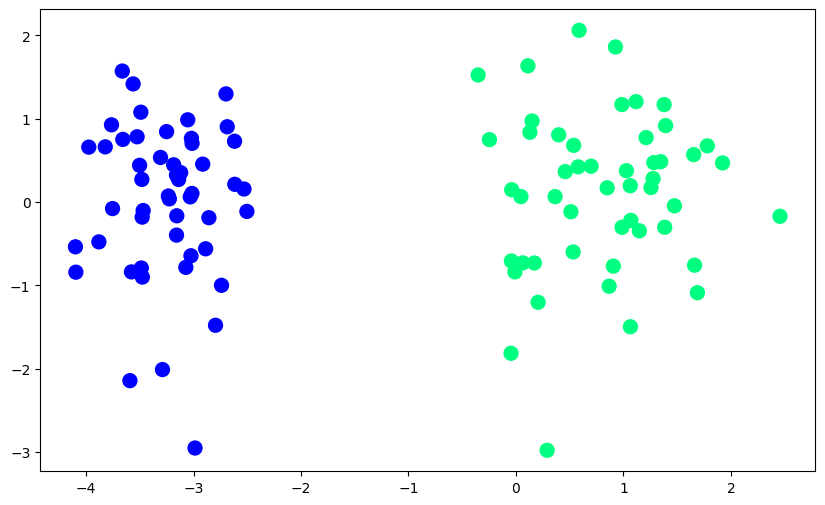

In [44]:
# Create a figure for plotting

plt.figure(figsize=(10, 6))
# Scatter plot of the generated data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [45]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with no penalty and 'sag' solver
# Increased max_iter to 10000 for convergence

lor = LogisticRegression(penalty=None,solver='sag', max_iter=10000)
# Train the model on the data
lor.fit(X,y)

LogisticRegression(max_iter=10000, penalty=None, solver='sag')

In [46]:
# Print the learned coefficients and intercept of the logistic regression model
print(lor.coef_)
print(lor.intercept_)

[[6.52369098 0.37311042]]
[8.20394689]


In [47]:
# Calculate the slope (m1) and intercept (b1) of the decision boundary from the logistic regression model
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [48]:
# Generate x values for plotting the decision boundary
x_input = np.linspace(-3,3,100)

# Calculate corresponding y values for the decision boundary
y_input = m1*x_input + b1

In [49]:
# Gradient Descent function for logistic regression

def gd(X,y):
  # Add a column of ones to X for the intercept term
  X =np.insert(X,0,1,axis = 1)
  # Initialize weights
  weights = np.ones(X.shape[1])
  # Set learning rate
  lr = 0.5
  # Iterate for a fixed number of times
  for i in range(5000):
    # Calculate predicted probabilities using sigmoid
    y_hat =sigmoid(np.dot(X,weights))
    # Update weights using gradient descent
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

  # Return coefficients and intercept
  return weights[1:],weights[0]

In [50]:
# Sigmoid activation function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [51]:
# Get coefficients and intercept from gradient descent function
coef_, intercept_ = gd(X,y)

In [52]:
# Calculate the slope (m) and intercept (b) of the decision boundary from gradient descent
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [53]:
# Generate x values for plotting the decision boundary from gradient descent
x_input1 = np.linspace(-3,3,100)
# Calculate corresponding y values for the decision boundary from gradient descent
y_input1 = m*x_input1 + b

(-3.0, 2.0)

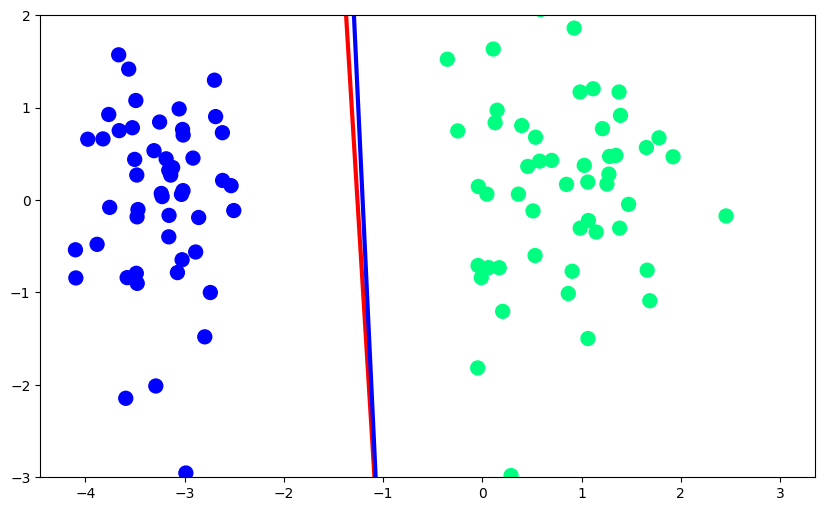

In [54]:
# Create a new figure for plotting

plt.figure(figsize=(10,6))
# Plot the decision boundary from LogisticRegression model
plt.plot(x_input, y_input, color='red', linewidth=3)
# Plot the decision boundary from gradient descent
plt.plot(x_input1, y_input1, color='blue', linewidth=3)
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
# Set the y-axis limits
plt.ylim(-3,2)